# Cut on time

In [24]:
from importlib import reload
import numpy as np
from cugn import arcteryx

import seaborn as sns

# Load up

In [2]:
adict = arcteryx.load_ctd()

# Cut on time

## Figure out units

In [3]:
adict['time'][0:2]

array([1.68552765e+09, 1.68553544e+09])

In [4]:
dt = adict['time'][1] - adict['time'][0]
dt

7794.249999046326

## Must be seconds

## Explore

In [5]:
dt = adict['time'][0] - adict['time'][1:]

Text(0.5, 0, 'Dt (days)')

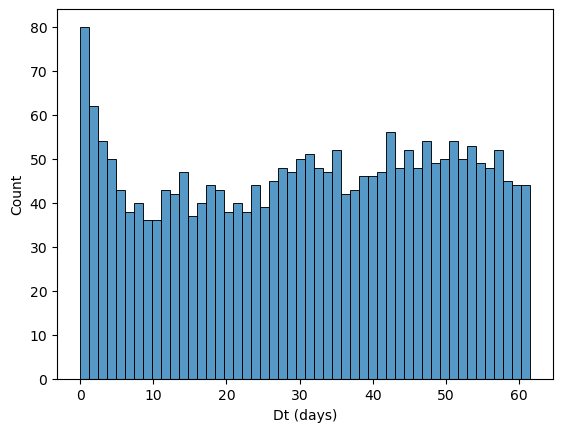

In [6]:
ax = sns.histplot(-1*dt/3600/24, bins=50)
ax.set_xlabel('Dt (days)')

# Grab all pairs within 12 hours

In [7]:
t = adict['time']

In [12]:
dt = np.zeros((t.size, t.size))
for kk in range(t.size):
    dt[kk] = (t[kk] - t)/3600.  # hours

## Take only the positive values

In [13]:
pos = dt > 0.
np.sum(pos)

2743653

In [14]:
(t.size**2 - t.size)/2

2743653.0

In [15]:
idx = np.where(pos)
idx[0]

array([   0,    0,    0, ..., 2342, 2342, 2342])

In [17]:
cut_dt = dt[idx]

## Plot em

Text(0.5, 0, 'Dt (hours)')

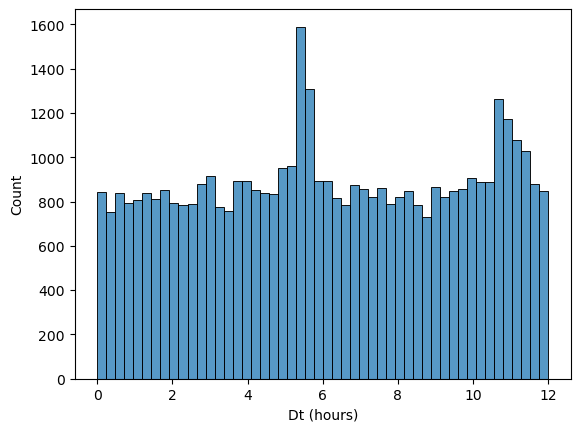

In [20]:
ax = sns.histplot(cut_dt[cut_dt < 12], bins=50)
ax.set_xlabel('Dt (hours)')

In [21]:
np.sum(cut_dt<12)

44459

----

# As a method

In [25]:
reload(arcteryx)
dt, idx = arcteryx.cut_on_time(12., adict=adict)

Text(0.5, 0, 'Dt (hours)')

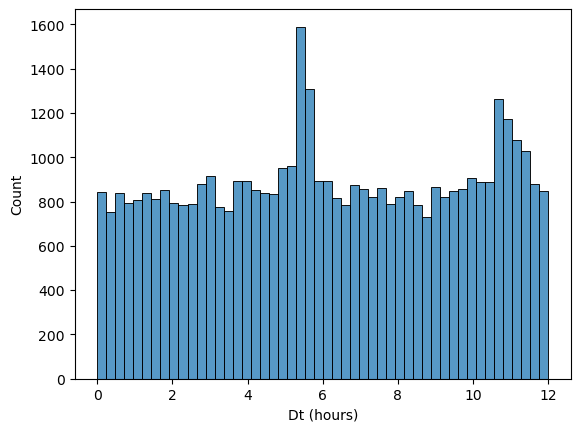

In [26]:
ax = sns.histplot(dt, bins=50)
ax.set_xlabel('Dt (hours)')